## Evaluation Exercise - Regression Exercises

In [4]:
import math

import pandas as pd
import numpy as np
import seaborn as sns 
from pydataset import data 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Question 1: Load the tips dataset from either pydataset or seaborn.



In [5]:
tips_df = data('tips')   ##loading the tips dataset into a dataframe using pydataset
tips_df.head()           ##displaying dataset

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


#### Question 2: Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.



In [7]:
model = LinearRegression().fit(tips_df[['total_bill']], tips_df.tip)
tips_df['yhat'] = model.predict(tips_df[['total_bill']])

In [8]:
tips_df['yhat_baseline'] = tips_df.tip.mean() 

In [9]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


#### Question 3: Plot the residuals for the linear regression model that you made.



In [12]:
tips_df['baseline_residuals'] = tips_df.tip - tips_df.yhat_baseline
tips_df['residuals'] = tips_df.tip - tips_df.yhat

In [13]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


<AxesSubplot:ylabel='Frequency'>

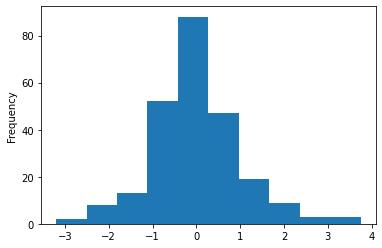

In [15]:
tips_df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

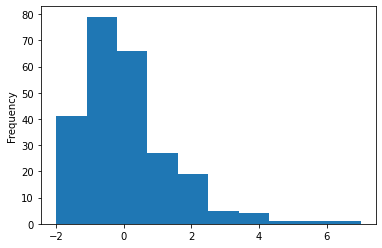

In [14]:
tips_df.baseline_residuals.plot.hist()

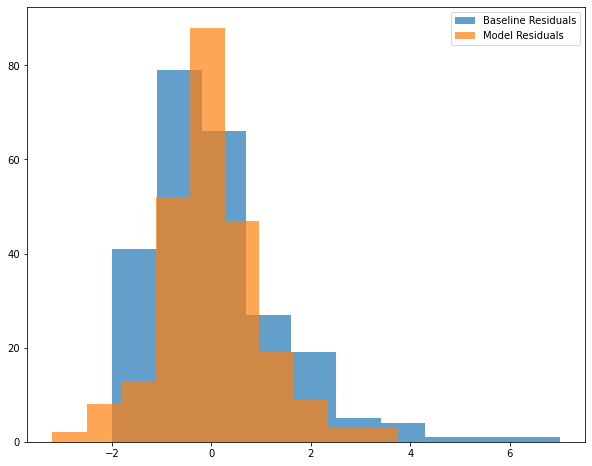

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(tips_df.baseline_residuals, label='Baseline Residuals', alpha = .7)
ax.hist(tips_df.residuals, label='Model Residuals', alpha = .7)
ax.legend()

#### Question 4: Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [18]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


#### Model Scoring and Evaluating

##### Calculating Sum of Squared Errors

In [19]:
sse = (tips_df.residuals ** 2).sum()
sse

252.788743850776

##### Calculating Mean Squared Errors

In [20]:
n = tips_df.shape[0]
mse = sse / n
mse

1.036019442011377

Calculating Root Mean Squared Errors

In [21]:
rmse = math.sqrt(mse)
rmse

1.0178504025697377

#### Comparing Model to Baseline

In [28]:
sse_baseline = (tips_df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'Model scores --> sse: {sse} mse: {mse} rmse: {rmse}')
print(f'Baseline scores --> sse: {sse_baseline} mse: {mse_baseline} rmse: {rmse_baseline}')

Model scores --> sse: 252.788743850776 mse: 1.036019442011377 rmse: 1.0178504025697377
Baseline scores --> sse: 465.2124770491804 mse: 1.906608512496641 rmse: 1.3807999538298954


##### Calculating model ESS (Explained Sum of Squares) & TSS (Total Sum of Squares)

In [31]:
ess = ((tips_df.yhat - tips_df.tip.mean())**2).sum()
tss = ((tips_df.tip - tips_df.tip.mean())**2).sum()

print(f' Model ess: {ess} Model tss: {tss}')

 Model ess: 212.42373319840422 Model tss: 465.2124770491804
